In [132]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [65]:
import numpy as np

In [66]:
df_train = pd.read_csv("cleaned_dataset_version2.csv")

In [67]:
df_train.isna().sum()

Unnamed: 0                           0
deviceid                             0
avg_time_charging_lag1               0
avg_time_charging_lag2               0
avg_time_charging_lag3               0
charging_rate_lag3                   0
avg_time_discharging_lag1            0
avg_time_discharging_lag2            0
avg_time_discharging_lag3            0
discharging_rate_lag3                0
fail_7                               0
charge_cycle_time_below_12           0
avg_time_charging_lag4               0
avg_time_discharging_lag4            0
discharging_rate_lag4                0
discharging_rate_lag5                0
charging_rate_lag4                   0
charging_rate_lag5                   0
chargecycles                         0
dischargecycles                      0
total_off_time                       0
number_times_restart                 0
avg_volt_change_charging             0
avg_volt_change_discharging          0
avg_time_charging                    0
avg_time_discharging     

In [68]:
df_train

,Unnamed: 0,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,...,avg_time_discharging_lag11_median,avg_time_discharging_lag6_median,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random
0,0,28647,5.12,41.11,6.56,0.086667,4.37,91.70,15.70,-1.163333,...,6.07,79.33,0.816667,-0.173333,5.01,4.70,4.93,3.10,5.03,4.91
1,1,36175,36.60,5.16,6.23,0.136667,62.67,6.53,6.16,-0.066667,...,49.02,24.33,-3.063333,-0.103333,10.89,18.93,21.39,35.90,5.23,7.31
2,2,16107,5.51,5.04,4.52,-0.460000,5.13,5.65,4.14,-2.643333,...,6.23,5.73,0.000000,0.216667,5.13,4.37,4.73,3.50,26.79,41.29
3,3,27362,4.66,39.85,35.76,0.076667,3.93,76.37,60.86,-0.166667,...,4.15,52.99,-0.293333,-0.046667,4.71,3.82,13.27,18.62,4.97,4.16
4,4,19463,5.10,43.24,4.63,0.040000,4.69,71.44,3.80,0.066667,...,4.64,76.42,-0.006667,-1.790000,5.28,5.16,25.10,47.76,21.62,37.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,40495,16284,4.97,5.81,5.01,-0.083333,7.13,5.41,5.60,-0.160000,...,5.91,20.12,-0.026667,0.060000,33.39,74.08,34.80,53.14,4.58,4.01
40496,40496,49732,4.81,4.53,31.68,0.016667,4.71,3.99,49.68,0.533333,...,5.20,39.07,-0.540000,0.450000,27.65,42.56,26.34,36.82,33.77,65.97
40497,40497,43158,4.73,4.77,5.71,-0.020000,3.83,3.48,4.51,0.006667,...,5.61,72.40,-0.006667,-3.506667,4.39,4.15,4.49,4.18,23.74,37.50
40498,40498,5860,4.93,5.01,4.85,-0.103333,3.35,4.30,4.12,0.036667,...,3.49,4.13,0.203333,0.040000,5.19,5.06,18.13,28.20,48.68,89.30


In [69]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [70]:
#df_train[filt_1][0:10].plot(x = "deviceid", y = "max_voltage_day")

In [71]:
filt_0 = (df_train["fail_7"] == 0)
filt_1 = (df_train["fail_7"] == 1)

In [72]:
df_train[filt_0]['max_voltage_day'].describe()

count    31099.000000
mean      4158.610185
std         11.285629
min       4112.454545
25%       4151.058824
50%       4158.545455
75%       4166.066667
max       4206.235294
Name: max_voltage_day, dtype: float64

In [73]:
df_train[filt_1]['max_voltage_day'].describe()

count    9401.000000
mean     4161.435878
std        11.104256
min      4122.315789
25%      4153.941176
50%      4161.333333
75%      4168.863636
max      4208.900000
Name: max_voltage_day, dtype: float64

In [74]:
df_train[filt_1]['chargecycles'].describe()

count    9401.000000
mean       86.623749
std        15.122433
min        28.454545
25%        76.666667
50%        86.714286
75%        96.764706
max       145.388889
Name: chargecycles, dtype: float64

In [75]:
df_train[filt_0]['chargecycles'].describe()

count    31099.000000
mean        84.481022
std         15.535585
min         14.666667
25%         74.055556
50%         84.500000
75%         94.842105
max        144.000000
Name: chargecycles, dtype: float64

In [76]:
import seaborn as sns

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chargecycles'>

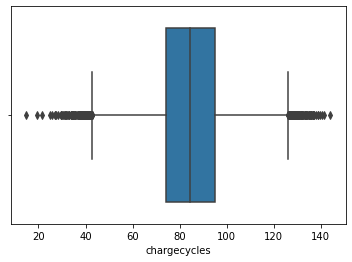

In [77]:
sns.boxplot('chargecycles',data=df_train[filt_0])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chargecycles'>

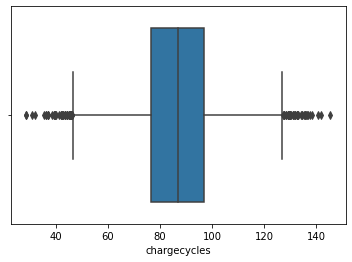

In [78]:
sns.boxplot('chargecycles',data=df_train[filt_1])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dischargecycles'>

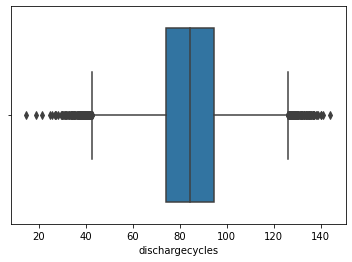

In [79]:
sns.boxplot('dischargecycles',data=df_train[filt_0])

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dischargecycles'>

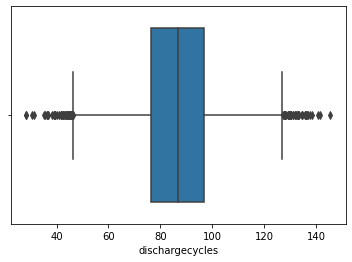

In [80]:
sns.boxplot('dischargecycles',data=df_train[filt_1])

In [81]:
df_train[filt_1]['dischargecycles'].describe()

count    9401.000000
mean       86.508315
std        15.160126
min        28.230769
25%        76.526316
50%        86.600000
75%        96.653846
max       145.333333
Name: dischargecycles, dtype: float64

In [82]:
df_train[filt_0]['dischargecycles'].describe()

count    31099.000000
mean        84.360436
std         15.576914
min         14.416667
25%         73.904762
50%         84.363636
75%         94.737986
max        144.111111
Name: dischargecycles, dtype: float64

<AxesSubplot:xlabel='deviceid'>

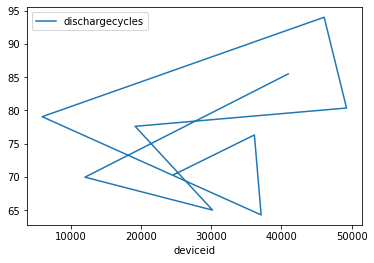

In [83]:
df_train[filt_1][0:10].plot(x = "deviceid", y = "dischargecycles")

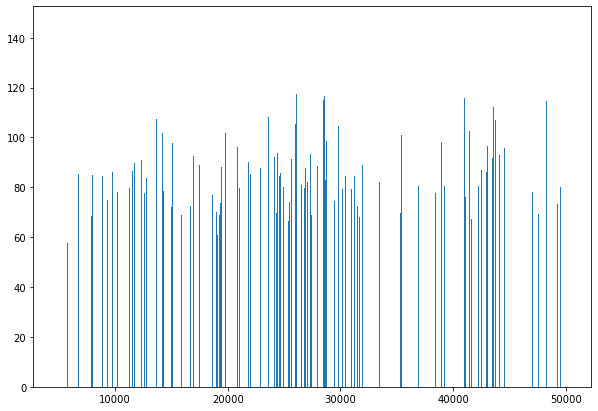

In [84]:
from matplotlib import pyplot as plt
 
device_id = df_train[filt_1]['deviceid']
discharge_cycles = df_train[filt_1]['dischargecycles']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(device_id, discharge_cycles)
 
# Show Plot
plt.show()

<AxesSubplot:xlabel='deviceid', ylabel='dischargecycles'>

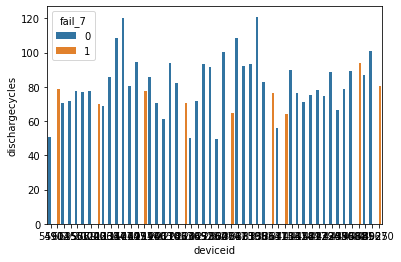

In [85]:
import seaborn as sns
sns.barplot(data=df_train[0:50], x='deviceid', hue='fail_7', y='dischargecycles')

<AxesSubplot:xlabel='deviceid', ylabel='dischargecycles'>

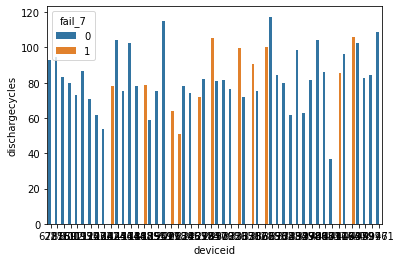

In [86]:
sns.barplot(data=df_train[50:100], x='deviceid', hue='fail_7', y='dischargecycles')

In [87]:
sysdate -df_train[filt_1]['Date Deployed']

NameError: name 'sysdate' is not defined

In [ ]:
df_train[filt_0]['Date Deployed'].describe()

In [ ]:
df_train[filt_1]['Date Deployed'].describe()

In [ ]:
df_train[filt_1]['Date Deployed']

In [88]:
df_train['Date Deployed']

0        10-06-2019
1          10/27/19
2          10/31/19
3        10-01-2019
4           9/13/19
            ...    
40495    09-05-2019
40496       9/18/19
40497      10/18/19
40498    10-02-2019
40499       9/16/19
Name: Date Deployed, Length: 40500, dtype: object

In [89]:
df_train['Date Deployed'] = pd.to_datetime(df_train['Date Deployed'])

In [90]:
df_train['Date Deployed']

0       2019-10-06
1       2019-10-27
2       2019-10-31
3       2019-10-01
4       2019-09-13
           ...    
40495   2019-09-05
40496   2019-09-18
40497   2019-10-18
40498   2019-10-02
40499   2019-09-16
Name: Date Deployed, Length: 40500, dtype: datetime64[ns]

In [91]:
df_train['LastRecord'] = pd.to_datetime(df_train['LastRecord'])

In [92]:
df_train['LastRecord']

0       2021-04-01
1       2021-04-01
2       2021-04-01
3       2021-04-01
4       2021-04-01
           ...    
40495   2021-04-01
40496   2021-04-01
40497   2021-04-01
40498   2021-04-01
40499   2021-04-01
Name: LastRecord, Length: 40500, dtype: datetime64[ns]

In [93]:
df_train['Days'] = df_train['LastRecord'] - df_train['Date Deployed']

In [94]:
df_train['Days']

0       543 days
1       522 days
2       518 days
3       548 days
4       566 days
          ...   
40495   574 days
40496   561 days
40497   531 days
40498   547 days
40499   563 days
Name: Days, Length: 40500, dtype: timedelta64[ns]

In [95]:
df_train[['LastRecord','Date Deployed','Days']]

,LastRecord,Date Deployed,Days
0,2021-04-01,2019-10-06,543 days
1,2021-04-01,2019-10-27,522 days
2,2021-04-01,2019-10-31,518 days
3,2021-04-01,2019-10-01,548 days
4,2021-04-01,2019-09-13,566 days
...,...,...,...
40495,2021-04-01,2019-09-05,574 days
40496,2021-04-01,2019-09-18,561 days
40497,2021-04-01,2019-10-18,531 days
40498,2021-04-01,2019-10-02,547 days


In [96]:
columns = df_train.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fail_7"]]
# Store the variable we are predicting 
target = "fail_7"
# Define a random state 
state = np.random.RandomState(42)
X = df_train[columns]
Y = df_train[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(40500, 54)
(40500,)


In [97]:
df_train.isnull().values.any()

False

In [98]:
LABELS = [0, 1]

In [99]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

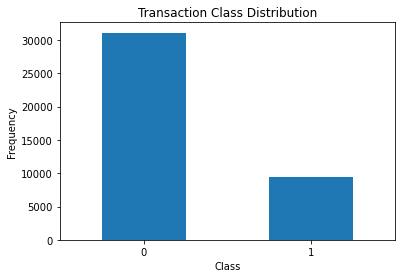

In [100]:
count_classes = pd.value_counts(df_train['fail_7'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [101]:
'''
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
'''

'\nimport numpy as np\nimport pandas as pd\nimport sklearn\nimport scipy\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.metrics import classification_report,accuracy_score\nfrom sklearn.ensemble import IsolationForest\nfrom sklearn.neighbors import LocalOutlierFactor\nfrom sklearn.svm import OneClassSVM\nfrom pylab import rcParams\nrcParams[\'figure.figsize\'] = 14, 8\nRANDOM_SEED = 42\nLABELS = ["Normal", "Fraud"]\n'

In [102]:
#!pip install imblearn

In [103]:
#pip install -U imbalanced-learn

In [104]:
#from imblearn import under_sampling, over_sampling
#from imblearn.under_sampling import NearMiss

In [105]:
#nm = NearMiss()
#X_res,y_res=nm.fit_sample(X,Y)

In [106]:
#from imblearn.under_sampling import RandomUnderSampler 

In [107]:
#y_res

In [108]:
#under_sampler = RandomUnderSampler()
#X_res, y_res = under_sampler.fit_resample(X, Y)

In [109]:
#y_res.value_counts()

In [110]:
#df_test_under = X_res.append(y_res,)

In [111]:
#X_res

In [112]:
#df_test_under.to_csv('cleaned_dataset_version3.csv')

In [113]:
#### https://github.com/shivayogibeeradar/State-Farm


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   deviceid                           40500 non-null  int64          
 1   avg_time_charging_lag1             40500 non-null  float64        
 2   avg_time_charging_lag2             40500 non-null  float64        
 3   avg_time_charging_lag3             40500 non-null  float64        
 4   charging_rate_lag3                 40500 non-null  float64        
 5   avg_time_discharging_lag1          40500 non-null  float64        
 6   avg_time_discharging_lag2          40500 non-null  float64        
 7   avg_time_discharging_lag3          40500 non-null  float64        
 8   discharging_rate_lag3              40500 non-null  float64        
 9   fail_7                             40500 non-null  int64          
 10  charge_cycle_time_belo

In [115]:
df_train.drop(['Date Deployed','LastRecord'], axis=1, inplace=True)

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   deviceid                           40500 non-null  int64          
 1   avg_time_charging_lag1             40500 non-null  float64        
 2   avg_time_charging_lag2             40500 non-null  float64        
 3   avg_time_charging_lag3             40500 non-null  float64        
 4   charging_rate_lag3                 40500 non-null  float64        
 5   avg_time_discharging_lag1          40500 non-null  float64        
 6   avg_time_discharging_lag2          40500 non-null  float64        
 7   avg_time_discharging_lag3          40500 non-null  float64        
 8   discharging_rate_lag3              40500 non-null  float64        
 9   fail_7                             40500 non-null  int64          
 10  charge_cycle_time_belo

In [117]:
df_train['Days'] = df_train['Days'].astype('timedelta64[D]').astype(int)

In [118]:
df_train['Days']

0        543
1        522
2        518
3        548
4        566
        ... 
40495    574
40496    561
40497    531
40498    547
40499    563
Name: Days, Length: 40500, dtype: int32

In [119]:
df_scaled = pd.DataFrame()

In [120]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df_train.columns if df_train[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(df_train[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in df_train.columns:
    try:
        df_scaled[col] = scaled[col]
    except:
        df_scaled[col] = df_train[col]
    
df_scaled.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,fail_7,...,avg_time_discharging_lag6_median,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days
0,0.525501,0.044546,0.409384,0.080534,0.890524,0.037009,0.828327,0.136601,0.365791,0,...,0.748637,0.622073,0.747085,0.024805,0.041633,0.024729,0.028677,0.028984,0.042778,0.686567
1,0.692793,0.432996,0.041909,0.076458,0.891102,0.597424,0.053068,0.047526,0.384668,0,...,0.213201,0.543742,0.748188,0.093281,0.168223,0.176043,0.340139,0.030757,0.065392,0.582090
2,0.246828,0.049358,0.040683,0.055336,0.884205,0.044314,0.045057,0.028665,0.340314,0,...,0.032126,0.605585,0.753230,0.026202,0.038698,0.022890,0.032476,0.221858,0.385565,0.562189
3,0.496944,0.038870,0.396504,0.441206,0.890409,0.032779,0.688786,0.558263,0.382947,0,...,0.492212,0.599664,0.749081,0.021311,0.033805,0.101397,0.176052,0.028452,0.035711,0.711443
4,0.321407,0.044299,0.431156,0.056695,0.889985,0.040085,0.643910,0.025490,0.386964,0,...,0.720308,0.605451,0.721609,0.027949,0.045725,0.210149,0.452759,0.176033,0.347875,0.800995


In [121]:
df_scaled['deviceid'] = df_train['deviceid']

In [ ]:
scaled_csv

In [122]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   deviceid                           40500 non-null  int64  
 1   avg_time_charging_lag1             40500 non-null  float64
 2   avg_time_charging_lag2             40500 non-null  float64
 3   avg_time_charging_lag3             40500 non-null  float64
 4   charging_rate_lag3                 40500 non-null  float64
 5   avg_time_discharging_lag1          40500 non-null  float64
 6   avg_time_discharging_lag2          40500 non-null  float64
 7   avg_time_discharging_lag3          40500 non-null  float64
 8   discharging_rate_lag3              40500 non-null  float64
 9   fail_7                             40500 non-null  int64  
 10  charge_cycle_time_below_12         40500 non-null  bool   
 11  avg_time_charging_lag4             40500 non-null  flo

In [123]:
df_train

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,fail_7,...,avg_time_discharging_lag6_median,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days
0,28647,5.12,41.11,6.56,0.086667,4.37,91.70,15.70,-1.163333,0,...,79.33,0.816667,-0.173333,5.01,4.70,4.93,3.10,5.03,4.91,543
1,36175,36.60,5.16,6.23,0.136667,62.67,6.53,6.16,-0.066667,0,...,24.33,-3.063333,-0.103333,10.89,18.93,21.39,35.90,5.23,7.31,522
2,16107,5.51,5.04,4.52,-0.460000,5.13,5.65,4.14,-2.643333,0,...,5.73,0.000000,0.216667,5.13,4.37,4.73,3.50,26.79,41.29,518
3,27362,4.66,39.85,35.76,0.076667,3.93,76.37,60.86,-0.166667,0,...,52.99,-0.293333,-0.046667,4.71,3.82,13.27,18.62,4.97,4.16,548
4,19463,5.10,43.24,4.63,0.040000,4.69,71.44,3.80,0.066667,0,...,76.42,-0.006667,-1.790000,5.28,5.16,25.10,47.76,21.62,37.29,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,4.97,5.81,5.01,-0.083333,7.13,5.41,5.60,-0.160000,1,...,20.12,-0.026667,0.060000,33.39,74.08,34.80,53.14,4.58,4.01,574
40496,49732,4.81,4.53,31.68,0.016667,4.71,3.99,49.68,0.533333,1,...,39.07,-0.540000,0.450000,27.65,42.56,26.34,36.82,33.77,65.97,561
40497,43158,4.73,4.77,5.71,-0.020000,3.83,3.48,4.51,0.006667,1,...,72.40,-0.006667,-3.506667,4.39,4.15,4.49,4.18,23.74,37.50,531
40498,5860,4.93,5.01,4.85,-0.103333,3.35,4.30,4.12,0.036667,0,...,4.13,0.203333,0.040000,5.19,5.06,18.13,28.20,48.68,89.30,547


In [135]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['deviceid','fail_7'], axis=1)
y = df_scaled['fail_7']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 23.27
% Positive class in Test  = 23.04


In [136]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (40500, 51)
Shape of X after SMOTE: (62198, 51)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: fail_7, dtype: float64

In [139]:
X_sm

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_charging_lag4,...,avg_time_discharging_lag6_median,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days
0,0.044546,0.409384,0.080534,0.890524,0.037009,0.828327,0.136601,0.365791,False,0.024585,...,0.748637,0.622073,0.747085,0.024805,0.041633,0.024729,0.028677,0.028984,0.042778,0.686567
1,0.432996,0.041909,0.076458,0.891102,0.597424,0.053068,0.047526,0.384668,False,0.129345,...,0.213201,0.543742,0.748188,0.093281,0.168223,0.176043,0.340139,0.030757,0.065392,0.582090
2,0.049358,0.040683,0.055336,0.884205,0.044314,0.045057,0.028665,0.340314,False,0.267046,...,0.032126,0.605585,0.753230,0.026202,0.038698,0.022890,0.032476,0.221858,0.385565,0.562189
3,0.038870,0.396504,0.441206,0.890409,0.032779,0.688786,0.558263,0.382947,False,0.021194,...,0.492212,0.599664,0.749081,0.021311,0.033805,0.101397,0.176052,0.028452,0.035711,0.711443
4,0.044299,0.431156,0.056695,0.889985,0.040085,0.643910,0.025490,0.386964,True,0.452949,...,0.720308,0.605451,0.721609,0.027949,0.045725,0.210149,0.452759,0.176033,0.347875,0.800995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62193,0.026881,0.041773,0.057785,0.892088,0.135931,0.028888,0.026073,0.365211,False,0.034510,...,0.011481,0.607363,0.748660,0.238341,0.312800,0.025160,0.054471,0.229808,0.421026,0.770825
62194,0.042215,0.041740,0.211022,0.889117,0.047179,0.035890,0.216202,0.381451,True,0.330132,...,0.131612,0.590360,0.748048,0.501020,0.810744,0.088293,0.139065,0.071993,0.109453,0.710298
62195,0.042597,0.377699,0.072223,0.892907,0.030416,0.670561,0.036708,0.395322,False,0.025959,...,0.018640,0.606358,0.749391,0.195124,0.268024,0.356672,0.665916,0.039755,0.047280,0.824102
62196,0.338408,0.188706,0.400080,0.889893,0.420549,0.236985,0.549227,0.384927,True,0.035460,...,0.789014,0.608714,0.750418,0.029648,0.044343,0.169898,0.256314,0.053712,0.084186,0.536067


In [144]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
62193    1
62194    1
62195    1
62196    1
62197    1
Name: fail_7, Length: 62198, dtype: int64

In [146]:
#frames = [X_sm,y_sm]
#smote_df= X.append([y_sm], ignore_index=True)
smote_df = pd.concat([X_sm, y_sm], axis=1)

In [147]:
smote_df

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_charging_lag4,...,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days,fail_7
0,0.044546,0.409384,0.080534,0.890524,0.037009,0.828327,0.136601,0.365791,False,0.024585,...,0.622073,0.747085,0.024805,0.041633,0.024729,0.028677,0.028984,0.042778,0.686567,0
1,0.432996,0.041909,0.076458,0.891102,0.597424,0.053068,0.047526,0.384668,False,0.129345,...,0.543742,0.748188,0.093281,0.168223,0.176043,0.340139,0.030757,0.065392,0.582090,0
2,0.049358,0.040683,0.055336,0.884205,0.044314,0.045057,0.028665,0.340314,False,0.267046,...,0.605585,0.753230,0.026202,0.038698,0.022890,0.032476,0.221858,0.385565,0.562189,0
3,0.038870,0.396504,0.441206,0.890409,0.032779,0.688786,0.558263,0.382947,False,0.021194,...,0.599664,0.749081,0.021311,0.033805,0.101397,0.176052,0.028452,0.035711,0.711443,0
4,0.044299,0.431156,0.056695,0.889985,0.040085,0.643910,0.025490,0.386964,True,0.452949,...,0.605451,0.721609,0.027949,0.045725,0.210149,0.452759,0.176033,0.347875,0.800995,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62193,0.026881,0.041773,0.057785,0.892088,0.135931,0.028888,0.026073,0.365211,False,0.034510,...,0.607363,0.748660,0.238341,0.312800,0.025160,0.054471,0.229808,0.421026,0.770825,1
62194,0.042215,0.041740,0.211022,0.889117,0.047179,0.035890,0.216202,0.381451,True,0.330132,...,0.590360,0.748048,0.501020,0.810744,0.088293,0.139065,0.071993,0.109453,0.710298,1
62195,0.042597,0.377699,0.072223,0.892907,0.030416,0.670561,0.036708,0.395322,False,0.025959,...,0.606358,0.749391,0.195124,0.268024,0.356672,0.665916,0.039755,0.047280,0.824102,1
62196,0.338408,0.188706,0.400080,0.889893,0.420549,0.236985,0.549227,0.384927,True,0.035460,...,0.608714,0.750418,0.029648,0.044343,0.169898,0.256314,0.053712,0.084186,0.536067,1


In [151]:
smote_df.to_csv('SMOTE_dataset.csv')

In [137]:
y_sm.value_counts()

0    31099
1    31099
Name: fail_7, dtype: int64

Accuracy = 0.83
Recall = 0.82



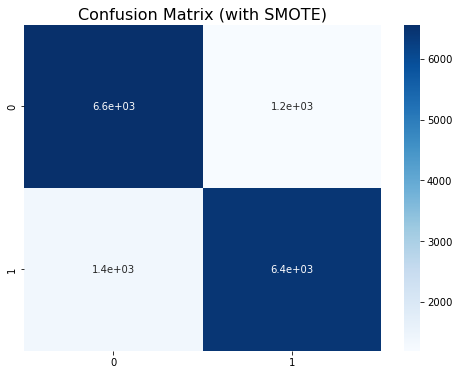

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');